In [1]:
import pandas as pd
import numpy as np

### Get the country codes (from some random dataset)

In [2]:
gdp = pd.read_csv('GDP by Country.csv')

In [3]:
country_codes = gdp[['Country Name', 'Country Code']].dropna()

In [4]:
country_codes

,Country Name,Country Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
259,Sub-Saharan Africa,SSF
260,Sub-Saharan Africa (excluding high income),SSA
261,Sub-Saharan Africa (IDA & IBRD countries),TSS
262,Upper middle income,UMC


### Average population over years 2014, 2015, 2016, 2017

In [5]:
country_population = pd.read_csv("data/country_population.csv")

In [6]:
country_population = country_population[['Country Name', '2014', '2015', '2016', '2017']]

In [7]:
country_population['average'] = country_population[['2014', '2015', '2016', '2017']].mean(axis=1)

### Read food consumption data from FAO

In [8]:
fao_consumption = pd.read_csv("data/FAO_Consumption.csv")

### Depression dataset

In [9]:
depression = pd.read_csv("data/depression.csv")

In [10]:
fao_consumption_filtered = fao_consumption.loc[fao_consumption['Year'].isin(['2014', '2015', '2016', '2017'])]

In [11]:
fao_consumption_filtered = pd.merge(fao_consumption_filtered, country_codes, left_on=['Country Name'], right_on=['Country Name'], how='left')

In [12]:
fao_consumption_filtered

,Unnamed: 0,Country Name,Year,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,Country Code
0,0,Afghanistan,2014,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0,AFG
1,1,Afghanistan,2015,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0,AFG
2,2,Afghanistan,2016,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0,AFG
3,3,Afghanistan,2017,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0,AFG
4,5,Albania,2014,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...
691,863,Zambia,2017,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0,ZMB
692,865,Zimbabwe,2014,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0,ZWE
693,866,Zimbabwe,2015,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0,ZWE
694,867,Zimbabwe,2016,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0,ZWE


In [13]:
depression_filtered = depression.loc[depression['Year'].isin(['2014', '2015', '2016', '2017'])]

### Merge FAO consumption and Depression datasets on Country and Year

In [14]:
FAO_consumption_depression = depression_filtered.merge(fao_consumption_filtered, left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], how='right')

In [15]:
FAO_consumption_depression

,Unnamed: 0_x,Country Name,Year,Depression Count,Unnamed: 0_y,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,Country Code
0,24.0,Afghanistan,2014,884404.683172,0,8371.0,1897.0,1072.0,562.36,1873.0,684.00,110.0,1.0,AFG
1,25.0,Afghanistan,2015,906133.433945,1,8105.0,2263.0,1203.0,551.20,1871.0,676.00,82.0,0.0,AFG
2,26.0,Afghanistan,2016,932188.730746,2,8773.0,2273.0,1039.0,531.05,3154.0,628.00,51.0,30.0,AFG
3,27.0,Afghanistan,2017,967281.203243,3,8656.0,2221.0,1207.0,520.00,2405.0,712.00,79.0,0.0,AFG
4,52.0,Albania,2014,68970.473430,5,1174.0,1151.0,571.0,203.23,956.0,185.00,6.0,106.0,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,6439.0,Zambia,2017,438079.199268,863,4769.0,400.0,125.0,607.80,1687.0,4651.00,5.0,633.0,ZMB
692,6464.0,Zimbabwe,2014,311665.769283,865,2556.0,473.0,231.0,384.26,539.0,4559.16,14.0,542.0,ZWE
693,6465.0,Zimbabwe,2015,320638.507158,866,2366.0,447.0,303.0,374.80,545.0,4081.16,13.0,391.0,ZWE
694,6466.0,Zimbabwe,2016,330437.353798,867,2426.0,441.0,308.0,364.47,539.0,4185.15,16.0,406.0,ZWE


In [16]:
FAO_consumption_depression = FAO_consumption_depression.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)

In [17]:
FAO_consumption_depression_by_country = FAO_consumption_depression.groupby(['Country Name']).sum().reset_index().drop(columns=['Year'])

In [18]:
FAO_consumption_depression_by_country.columns

Index(['Country Name', 'Depression Count', 'GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption'],
      dtype='object')

In [19]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,Afghanistan,3.690008e+06,33905.0,8654.0,4521.0,2164.61,9303.0,2700.00,322.0,31.0
1,Albania,2.772071e+05,4696.0,4654.0,2426.0,844.47,4075.0,756.01,30.0,428.0
2,Algeria,5.448569e+06,65426.0,15896.0,16900.0,5875.58,45305.0,10123.06,594.0,922.0
3,Angola,3.145100e+06,51533.0,1146.0,18958.0,5844.16,44965.0,6495.54,70.0,7710.0
4,Antigua and Barbuda,9.596469e+03,40.0,26.0,61.0,56.03,34.0,48.00,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),0.000000e+00,31292.0,14189.0,10592.0,8869.11,10329.0,26654.54,292.0,7070.0
170,Viet Nam,0.000000e+00,201532.0,3045.0,31702.0,43553.21,79619.0,86088.36,389.0,6808.0
171,Yemen,3.652485e+06,21248.0,1427.0,3161.0,2559.88,2929.0,4301.04,61.0,31.0
172,Zambia,1.633195e+06,18549.0,1611.0,542.0,2177.17,6434.0,18647.00,33.0,2096.0


In [20]:
FAO_consumption_depression_by_country

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,Afghanistan,3.690008e+06,33905.0,8654.0,4521.0,2164.61,9303.0,2700.00,322.0,31.0
1,Albania,2.772071e+05,4696.0,4654.0,2426.0,844.47,4075.0,756.01,30.0,428.0
2,Algeria,5.448569e+06,65426.0,15896.0,16900.0,5875.58,45305.0,10123.06,594.0,922.0
3,Angola,3.145100e+06,51533.0,1146.0,18958.0,5844.16,44965.0,6495.54,70.0,7710.0
4,Antigua and Barbuda,9.596469e+03,40.0,26.0,61.0,56.03,34.0,48.00,0.0,21.0
...,...,...,...,...,...,...,...,...,...,...
169,Venezuela (Bolivarian Republic of),0.000000e+00,31292.0,14189.0,10592.0,8869.11,10329.0,26654.54,292.0,7070.0
170,Viet Nam,0.000000e+00,201532.0,3045.0,31702.0,43553.21,79619.0,86088.36,389.0,6808.0
171,Yemen,3.652485e+06,21248.0,1427.0,3161.0,2559.88,2929.0,4301.04,61.0,31.0
172,Zambia,1.633195e+06,18549.0,1611.0,542.0,2177.17,6434.0,18647.00,33.0,2096.0


### Merge total population 

##### Change country name to match

In [21]:
country_name_changes = {'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
'Viet Nam': 'Vietnam',
 'United States of America': 'United States',
 'United Republic of Tanzania': 'Tanzania',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Slovakia': 'Slovak Republic',
 'Saint Lucia': 'St. Lucia',
 'Republic of Moldova': 'Moldova',
 "Democratic People's Republic of Korea":'Korea, Dem. People’s Rep.', 
 'Republic of Korea':'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
 'Gambia': 'Gambia, The',
 'Egypt': 'Egypt, Arab Rep.',
  "Côte d'Ivoire": "Cote d'Ivoire",
 'China, Hong Kong SAR': 'Hong Kong SAR, China',
 'China, Macao SAR':'Macao SAR, China',
 'China, mainland': 'China',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Bahamas':'Bahamas, The',
    'Yemen': 'Yemen, Rep.'
}

In [22]:
def change_to_match_name(name):
    if name in country_name_changes.keys():
        return country_name_changes[name]
    else:
        return name

In [23]:
FAO_consumption_depression_by_country['Country Name'] = FAO_consumption_depression_by_country['Country Name'].apply(change_to_match_name)

In [24]:
FAO_consumption_depression_by_country_w_population = pd.merge(FAO_consumption_depression_by_country, country_population[['Country Name', 'average']], left_on=['Country Name'], right_on=['Country Name'], how='left').dropna().drop_duplicates(subset=['Country Name'])

In [25]:
FAO_consumption_depression_by_country_w_population 

,Country Name,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption,average
0,Afghanistan,3.690008e+06,33905.0,8654.0,4521.0,2164.61,9303.0,2700.00,322.0,31.0,34865981.25
1,Albania,2.772071e+05,4696.0,4654.0,2426.0,844.47,4075.0,756.01,30.0,428.0,2879841.25
2,Algeria,5.448569e+06,65426.0,15896.0,16900.0,5875.58,45305.0,10123.06,594.0,922.0,40148078.50
3,Angola,3.145100e+06,51533.0,1146.0,18958.0,5844.16,44965.0,6495.54,70.0,7710.0,28371348.00
4,Antigua and Barbuda,9.596469e+03,40.0,26.0,61.0,56.03,34.0,48.00,0.0,21.0,94020.25
...,...,...,...,...,...,...,...,...,...,...,...
170,"Venezuela, RB",0.000000e+00,31292.0,14189.0,10592.0,8869.11,10329.0,26654.54,292.0,7070.0,29840887.75
171,Vietnam,0.000000e+00,201532.0,3045.0,31702.0,43553.21,79619.0,86088.36,389.0,6808.0,93156759.25
172,"Yemen, Rep.",3.652485e+06,21248.0,1427.0,3161.0,2559.88,2929.0,4301.04,61.0,31.0,26831101.25
174,Zambia,1.633195e+06,18549.0,1611.0,542.0,2177.17,6434.0,18647.00,33.0,2096.0,16124077.25


### Normalization by population

In [26]:
normalized_values = FAO_consumption_depression_by_country_w_population[list(FAO_consumption_depression_by_country.drop(columns=['Country Name']).columns)].div(FAO_consumption_depression_by_country_w_population['average'], axis=0)

In [27]:
normalized_values

,Depression Count,GBL Consumption,Dairy Consumption,Fruits Consumption,Meat Consumption,Vegetables Consumption,Confections Consumption,Caffeine Consumption,Alcohol Consumption
0,0.105834,0.000972,0.000248,0.000130,0.000062,0.000267,0.000077,0.000009,8.891188e-07
1,0.096258,0.001631,0.001616,0.000842,0.000293,0.001415,0.000263,0.000010,1.486193e-04
2,0.135712,0.001630,0.000396,0.000421,0.000146,0.001128,0.000252,0.000015,2.296498e-05
3,0.110855,0.001816,0.000040,0.000668,0.000206,0.001585,0.000229,0.000002,2.717530e-04
4,0.102068,0.000425,0.000277,0.000649,0.000596,0.000362,0.000511,0.000000,2.233561e-04
...,...,...,...,...,...,...,...,...,...
170,0.000000,0.001049,0.000475,0.000355,0.000297,0.000346,0.000893,0.000010,2.369232e-04
171,0.000000,0.002163,0.000033,0.000340,0.000468,0.000855,0.000924,0.000004,7.308112e-05
172,0.136129,0.000792,0.000053,0.000118,0.000095,0.000109,0.000160,0.000002,1.155376e-06
174,0.101289,0.001150,0.000100,0.000034,0.000135,0.000399,0.001156,0.000002,1.299919e-04


###### Actual update

In [28]:
FAO_consumption_depression_by_country_w_population.update(normalized_values)

### Scatter plots

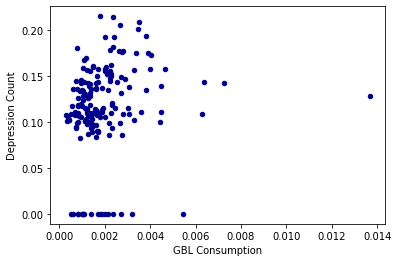

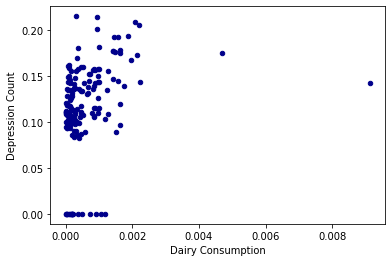

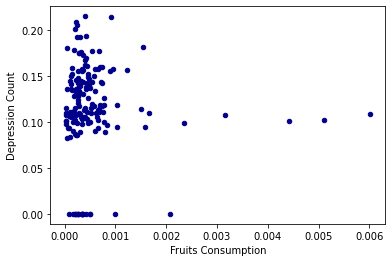

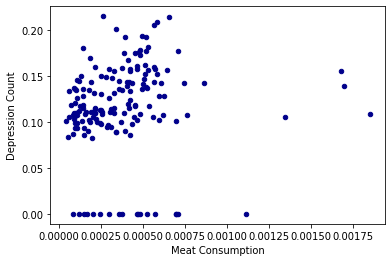

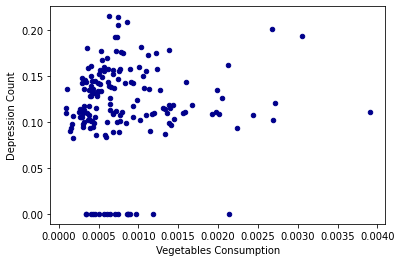

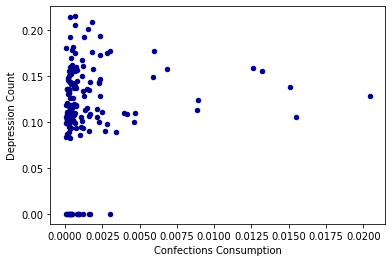

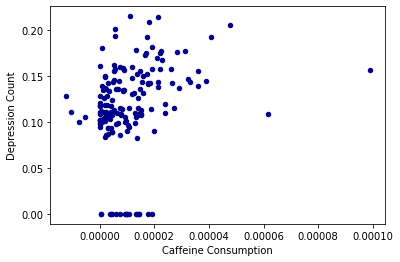

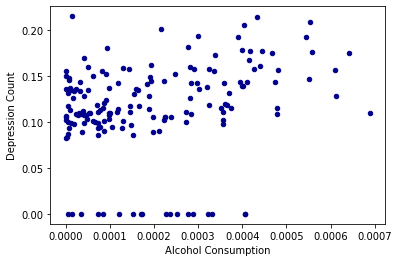

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


for column in ['GBL Consumption',
       'Dairy Consumption', 'Fruits Consumption', 'Meat Consumption',
       'Vegetables Consumption', 'Confections Consumption',
       'Caffeine Consumption', 'Alcohol Consumption']:
    
    ax1 = FAO_consumption_depression_by_country_w_population.plot.scatter(x=column,

                          y='Depression Count',

                          c='DarkBlue')

<AxesSubplot:>

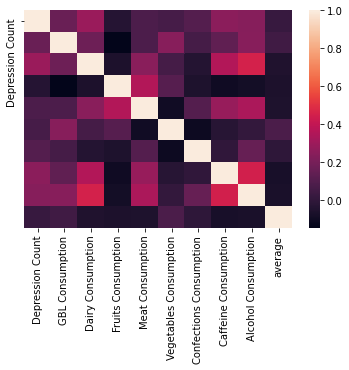

In [30]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = FAO_consumption_depression_by_country_w_population.groupby(['Country Name']).sum().reset_index().corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=['Depression Count'])

In [31]:
corr.loc['Depression Count']

Depression Count           1.000000
GBL Consumption            0.164202
Dairy Consumption          0.291758
Fruits Consumption        -0.031848
Meat Consumption           0.084097
Vegetables Consumption     0.067458
Confections Consumption    0.106700
Caffeine Consumption       0.254205
Alcohol Consumption        0.241233
average                    0.018195
Name: Depression Count, dtype: float64